In [2]:
# Torch - Torchvision - IceVision - IceData - MMDetection - YOLOv5 - EfficientDet Installation
!wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh

# Choose your installation target: cuda11 or cuda10 or cpu
!bash icevision_install.sh cuda11

--2022-02-18 09:22:07--  https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2691 (2.6K) [text/plain]
Saving to: ‘icevision_install.sh’

icevision_install.s 100%[===================>]   2.63K  --.-KB/s    in 0s      

2022-02-18 09:22:07 (45.1 MB/s) - ‘icevision_install.sh’ saved [2691/2691]

Installing icevision + dependencices for cuda11
- Installing torch and its dependencies
Looking in links: https://download.pytorch.org/whl/torch_stable.html
- Installing mmcv
     |████████████████████████████████| 51.3 MB 6.5 MB/s 
     |████████████████████████████████| 190 kB 3.7 MB/s 
- Installing mmdet
     |████████████████████████████████| 1.2 MB 5.4 MB/s 
- Installing icevision from PyPi

In [3]:
# Restart kernel after installation
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'restart': True, 'status': 'ok'}

In [2]:
from icevision.all import *
import pandas as pd

INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:18


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [143]:
data_url = Path('/content/gdrive/MyDrive/Cars/')
data_dir = '/content/'

In [144]:
data_url, data_dir

(Path('/content/gdrive/MyDrive/Cars'), '/content/')

In [145]:
files = data_url.glob('*')
df_image_details = pd.DataFrame(columns={'image_name', 'height', 'width'})

In [146]:
# Imports PIL module 
from PIL import Image
for image in files:
  if image != Path("/content/gdrive/MyDrive/Cars/.ipynb_checkpoints"):
    im = Image.open(image)
    w,h = im.size
    name = image.name
    #print(name)
    df_image_details.loc[len(df_image_details.index)] = [h, name, w] 

In [147]:
df_image_details

height image_name width
0      466      0.jpg   806
1      449      1.jpg   494
2      431      5.jpg   416
3      455   6(1).jpg   551
4      455      6.jpg   551
..     ...        ...   ...
277    725     79.jpg  1018
278    562     91.jpg   420
279    512    123.jpg   475
280    295    128.jpg   497
281    481   289.jfif   669

[282 rows x 3 columns]

In [148]:
df = pd.read_csv(data_dir + 'License.csv')
df.head()

image        xmin        ymin        xmax        ymax           label
0    0.jpg  584.043588  278.653997  700.653514  311.774120  License Plates
1    1.jpg   87.569157  392.482517  254.068386  448.476722  License Plates
2   10.jpg  209.778052  162.632029  406.098644  205.404307  License Plates
3  100.jpg  358.323088  311.588806  425.400740  333.783496  License Plates
4  101.jpg  181.204686  240.010496  292.798636  294.744215  License Plates

In [149]:
df = df.merge(df_image_details, how='inner', left_on='image', right_on='image_name')

In [150]:
df.head()

image        xmin        ymin        xmax        ymax           label  \
0    0.jpg  584.043588  278.653997  700.653514  311.774120  License Plates   
1    1.jpg   87.569157  392.482517  254.068386  448.476722  License Plates   
2   10.jpg  209.778052  162.632029  406.098644  205.404307  License Plates   
3  100.jpg  358.323088  311.588806  425.400740  333.783496  License Plates   
4  101.jpg  181.204686  240.010496  292.798636  294.744215  License Plates   

  height image_name width  
0    466      0.jpg   806  
1    449      1.jpg   494  
2    400     10.jpg   642  
3    418    100.jpg   600  
4    404    101.jpg   659

In [151]:
df.drop('image_name', inplace=True, axis=1)

In [152]:
df.to_csv('annotation.csv', index=False)

In [153]:
template_record = ObjectDetectionRecord()

In [154]:
template_record

BaseRecord

common: 
	- Image size None
	- Record ID: None
	- Filepath: None
	- Img: None
detection: 
	- BBoxes: []
	- Class Map: None
	- Labels: []

In [155]:
Parser.generate_template(template_record)

class MyParser(Parser):
    def __init__(self, template_record):
        super().__init__(template_record=template_record)
    def __iter__(self) -> Any:
    def __len__(self) -> int:
    def record_id(self, o: Any) -> Hashable:
    def parse_fields(self, o: Any, record: BaseRecord, is_new: bool):
        record.set_img_size(<ImgSize>)
        record.set_filepath(<Union[str, Path]>)
        record.detection.add_bboxes(<Sequence[BBox]>)
        record.detection.set_class_map(<ClassMap>)
        record.detection.add_labels(<Sequence[Hashable]>)


In [156]:
class LicenseParser(Parser):
    def __init__(self, template_record, data_dir):
        super().__init__(template_record=template_record)

        self.data_dir = data_dir
        self.df = pd.read_csv(data_dir + "annotation.csv")
        self.class_map = ClassMap(list(self.df['label'].unique()))
        
    def __iter__(self) -> Any:
        for o in self.df.itertuples():
            yield o

    def __len__(self) -> int:
        return len(self.df)

    def record_id(self, o) -> Hashable:
        return o.image

    def parse_fields(self, o, record, is_new):
        if is_new:
            record.set_filepath(self.data_dir + 'gdrive/MyDrive/Cars/' +  o.image)
            record.set_img_size(ImgSize(width=o.width, height=o.height))
            record.detection.set_class_map(self.class_map)

        record.detection.add_bboxes([BBox.from_xyxy(o.xmin, o.ymin, o.xmax, o.ymax)])
        record.detection.add_labels([o.label])


In [157]:
parser = LicenseParser(template_record, data_dir)

In [158]:
train_records, valid_records = parser.parse()

  0%|          | 0/207 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/207 [00:00<?, ?it/s]

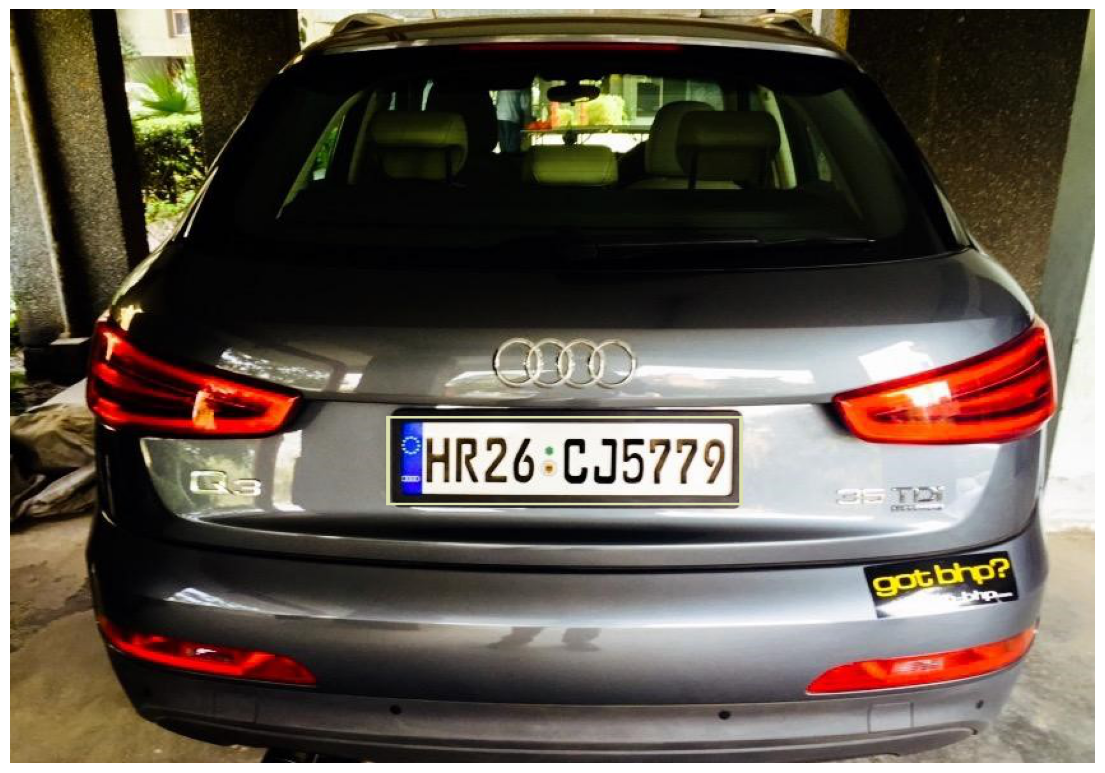

In [159]:
show_record(train_records[0], display_label=False, figsize=(14, 10))

In [160]:
train_records[0]

BaseRecord

common: 
	- Image size ImgSize(width=851, height=591)
	- Record ID: 78.JPG
	- Filepath: /content/gdrive/MyDrive/Cars/78.JPG
	- Img: None
detection: 
	- BBoxes: [<BBox (xmin:296.9580764488286, ymin:319.4142589128673, xmax:573.9790382244144, ymax:388.696674543418)>]
	- Class Map: <ClassMap: {'background': 0, 'License Plates': 1}>
	- Labels: [1]

In [161]:
# Transforms
# size is set to 384 because EfficientDet requires its inputs to be divisible by 128
image_size = 384
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=512), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])

In [162]:
# Datasets
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

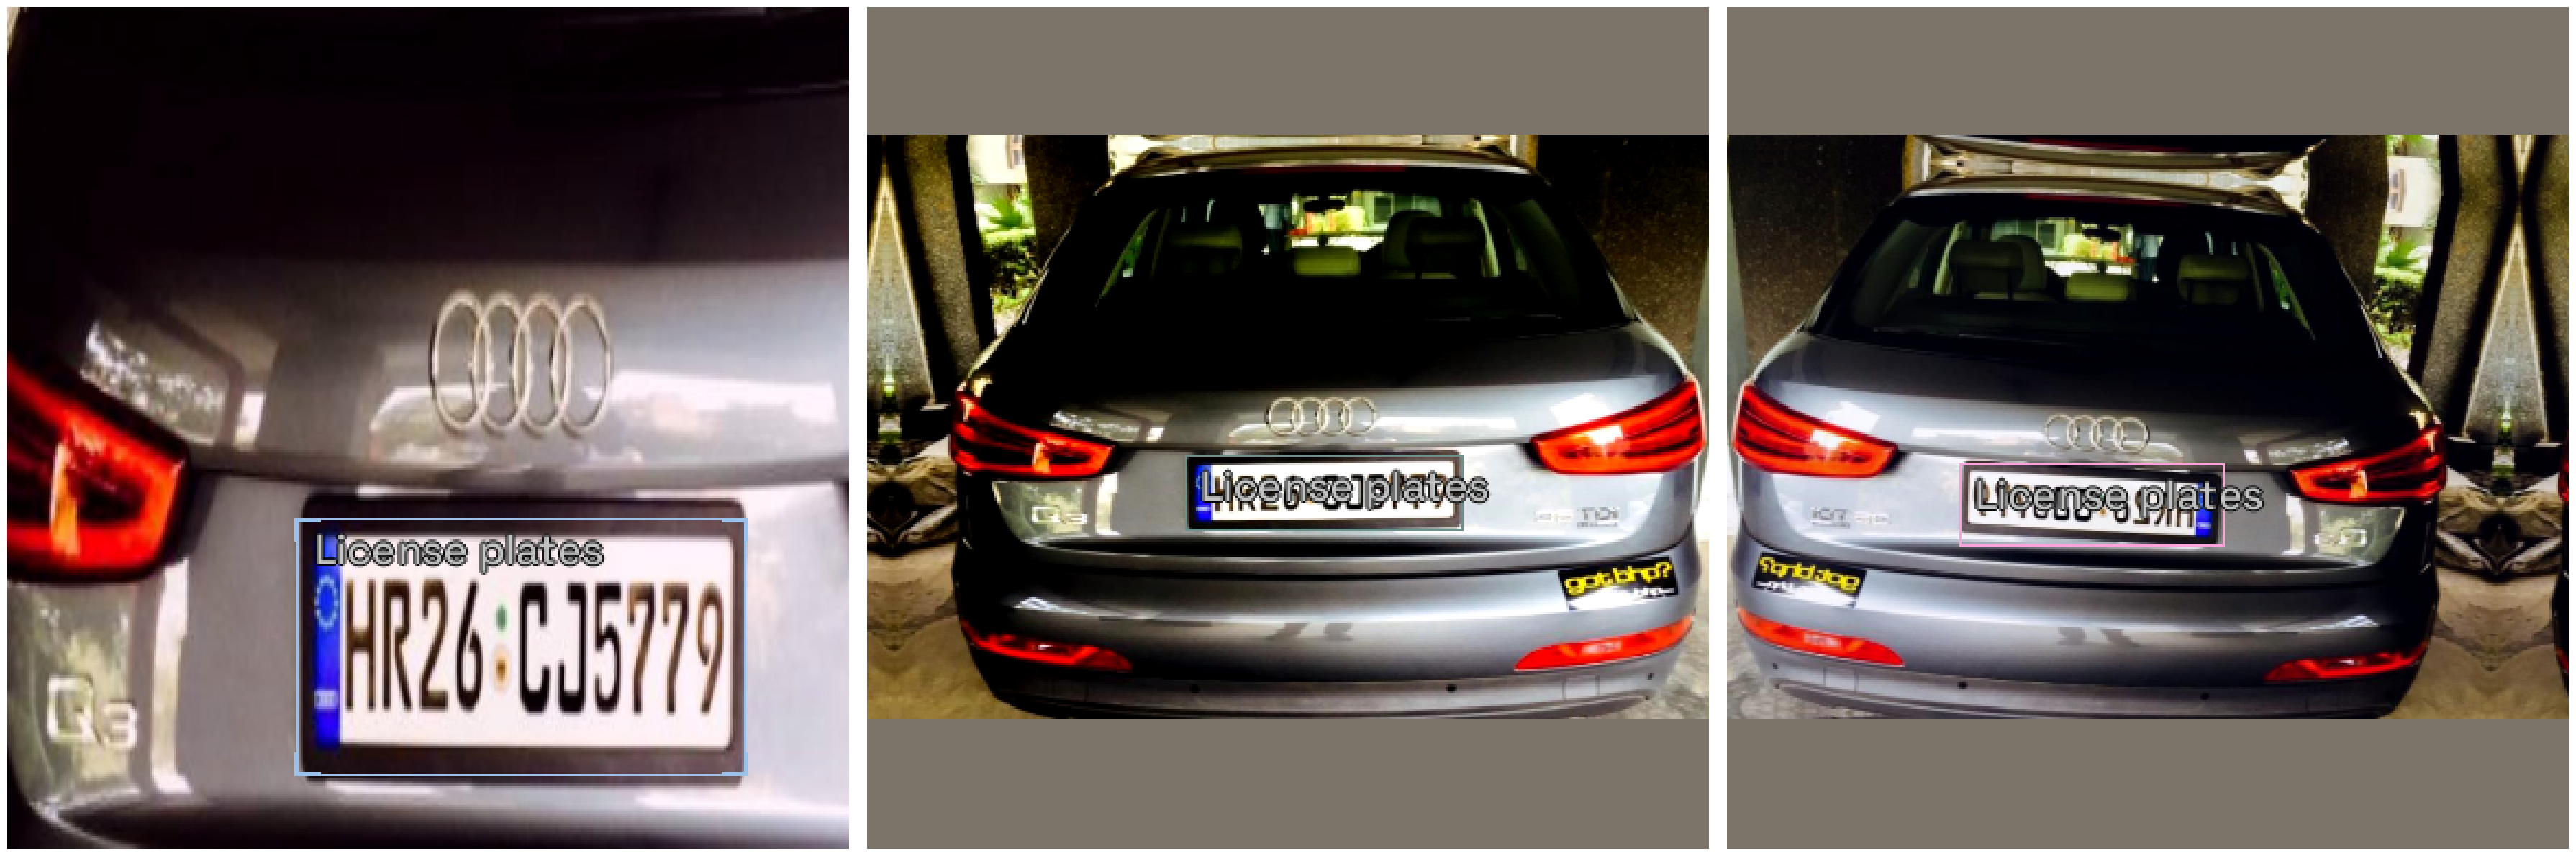

In [163]:
# Show an element of the train_ds with augmentation transformations applied
samples = [train_ds[0] for _ in range(3)]
show_samples(samples, ncols=3)

In [177]:
# Just change the value of selection to try another model

selection = 0

extra_args = {}

if selection == 0:
  model_type = models.mmdet.vfnet
  backbone = model_type.backbones.swin_t_p4_w7_fpn_1x_coco

if selection == 0:
  model_type = models.mmdet.vfnet
  backbone = model_type.backbones.resnet50_fpn_mstrain_2x

if selection == 6:
  model_type = models.mmdet.retinanet
  backbone = model_type.backbones.resnet50_fpn_1x

elif selection == 2:
  model_type = models.mmdet.faster_rcnn
  backbone = model_type.backbones.resnet50_fpn_1x
  # extra_args['cfg_options'] = { 
  #   'model.bbox_head.loss_bbox.loss_weight': 2,
  #   'model.bbox_head.loss_cls.loss_weight': 0.8,
  #    }
  
elif selection == 3:
  # The Retinanet model is also implemented in the torchvision library
  model_type = models.torchvision.retinanet
  backbone = model_type.backbones.resnet50_fpn

elif selection == 4:
  model_type = models.ross.efficientdet
  backbone = model_type.backbones.tf_lite0
  # The efficientdet model requires an img_size parameter
  extra_args['img_size'] = image_size

elif selection == 5:
  model_type = models.ultralytics.yolov5
  backbone = model_type.backbones.small
  # The yolov5 model requires an img_size parameter
  extra_args['img_size'] = image_size

model_type, backbone, extra_args

(<module 'icevision.models.mmdet.models.vfnet' from '/usr/local/lib/python3.7/dist-packages/icevision/models/mmdet/models/vfnet/__init__.py'>,
 {})

In [178]:
# Instantiate the model
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(parser.class_map), **extra_args) 

/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
2022-02-18 11:43:55,695 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2022-02-18 11:43:55,696 - mmcv - INFO - load model from: torchvision://resnet50
2022-02-18 11:43:55,701 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2022-02-18 11:43:55,807 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2022-02-18 11:43:55,858 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2022-02-18 11:43:55,895 - mmcv - INFO - initialize VFNetHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'No

load checkpoint from local path: checkpoints/vfnet/vfnet_r50_fpn_mstrain_2x_coco_20201027-7cc75bd2.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.vfnet_cls.weight: copying a param with shape torch.Size([80, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([1, 256, 3, 3]).
size mismatch for bbox_head.vfnet_cls.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([1]).


In [179]:
# Data Loaders
train_dl = model_type.train_dl(train_ds, batch_size=8, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=8, num_workers=4, shuffle=False)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [180]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

In [181]:
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


SuggestedLRs(valley=0.0003311311302240938)

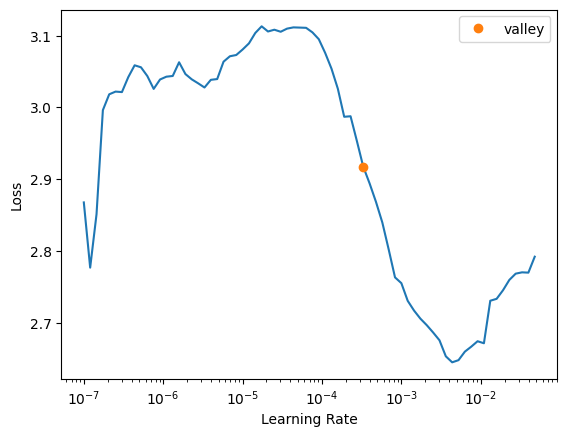

In [182]:
learn.lr_find()

In [184]:
learn.fine_tune(25, 0.0003311311302240938, freeze_epochs=3)

/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


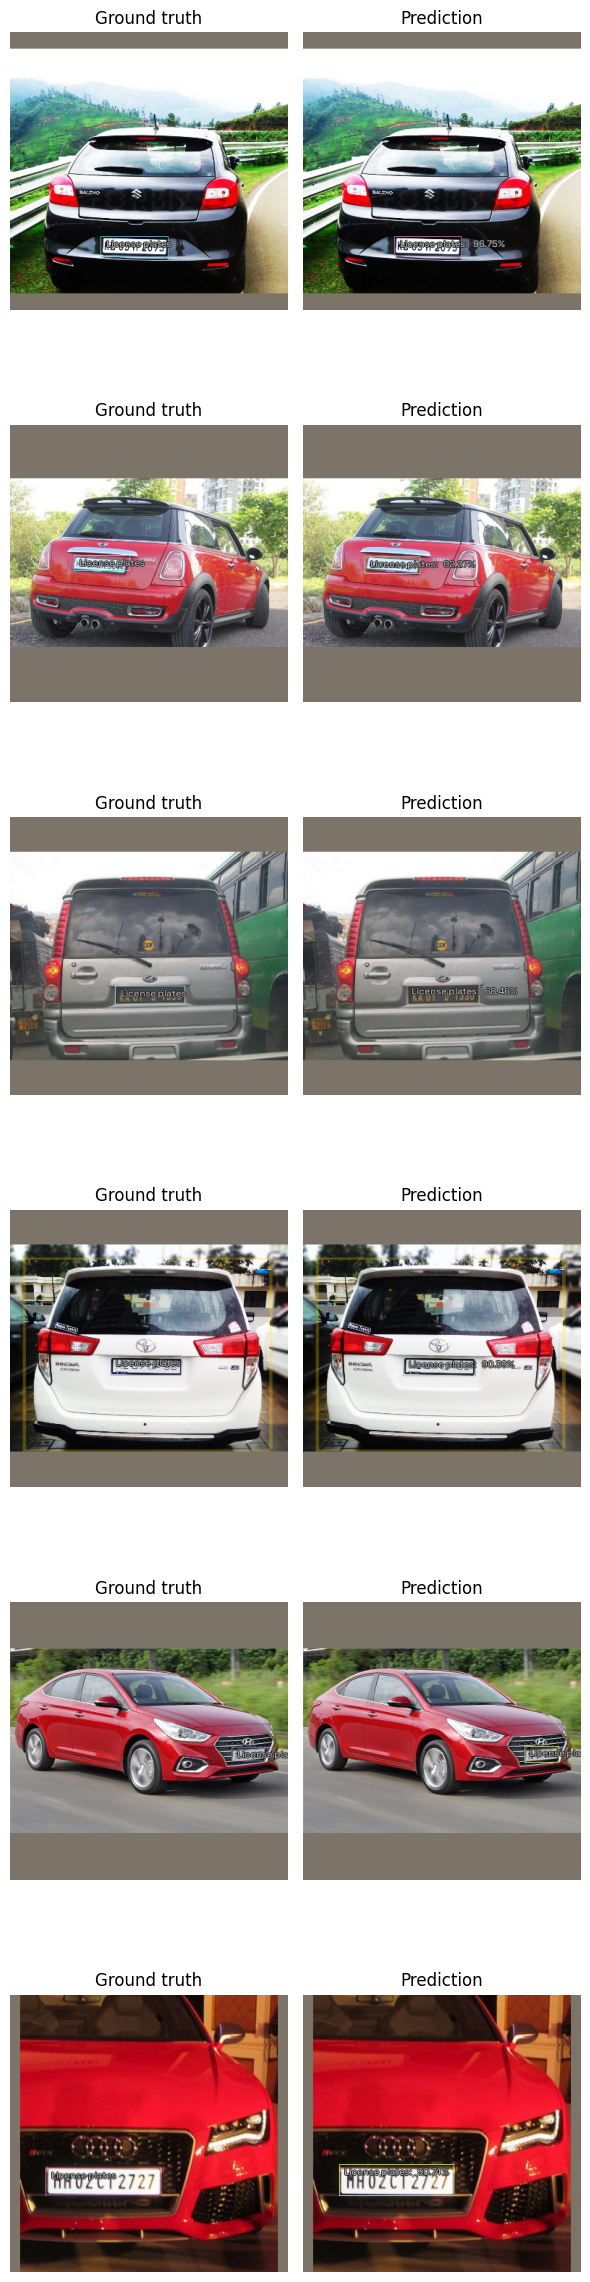

In [186]:
model_type.show_results(model, valid_ds, detection_threshold=.5)

In [204]:
infer_dl = model_type.infer_dl(valid_ds, batch_size=4, shuffle=False)
preds = model_type.predict_from_dl(model, infer_dl, keep_images=True)

  0%|          | 0/11 [00:00<?, ?it/s]

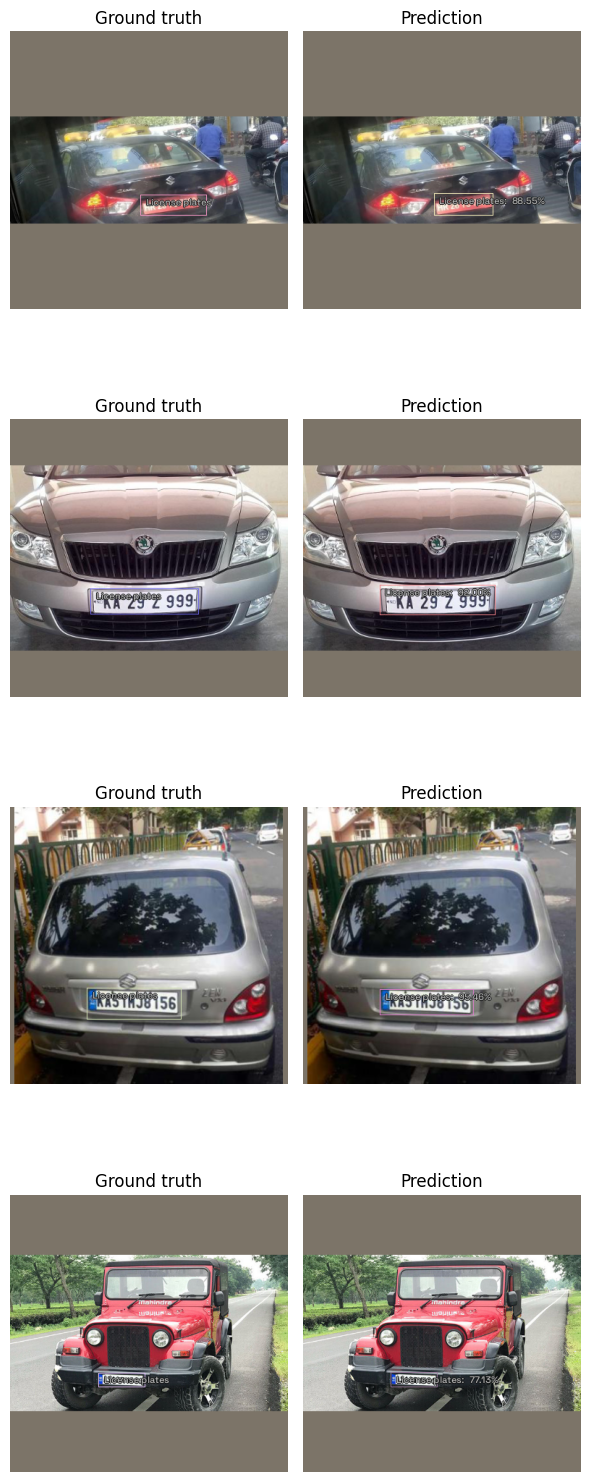

In [205]:
show_preds(preds=preds[:4])

In [227]:
bbox_preds = preds[0].pred.detection.bboxes

In [247]:
x = preds[0].pred.detection.record.record_id
x

'25.jpg'

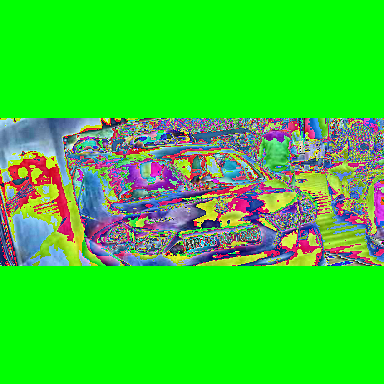

In [242]:
#pil_im = Image.fromarray((x * 255).astype(np.uint8)).resize((x.shape[0], x.shape[1])).convert('RGB')
#pil_im

In [225]:
pred_im = Image.fromarray(preds[0].pred.detection.img)
pred_im

TypeError: ignored

In [ ]:
import cv2

# Visualizing the data
color = (0, 0, 255) # RED
for line in content.split("\n"):
    image_path, xmin, ymin, xmax, ymax = line.split(",")
    image = cv2.imread(image_path)
    pt1 = (int(xmin), int(ymin))
    pt2 = (int(xmax), int(ymax))
    cv2.rectangle(image, pt1, pt2, color)
    cv2.imshow("Visualization bounding box", image)

INFO     - Losses returned by model: ['loss_cls', 'loss_bbox'] | icevision.models.interpretation:plot_top_losses:219


  0%|          | 0/42 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


  0%|          | 0/6 [00:00<?, ?it/s]

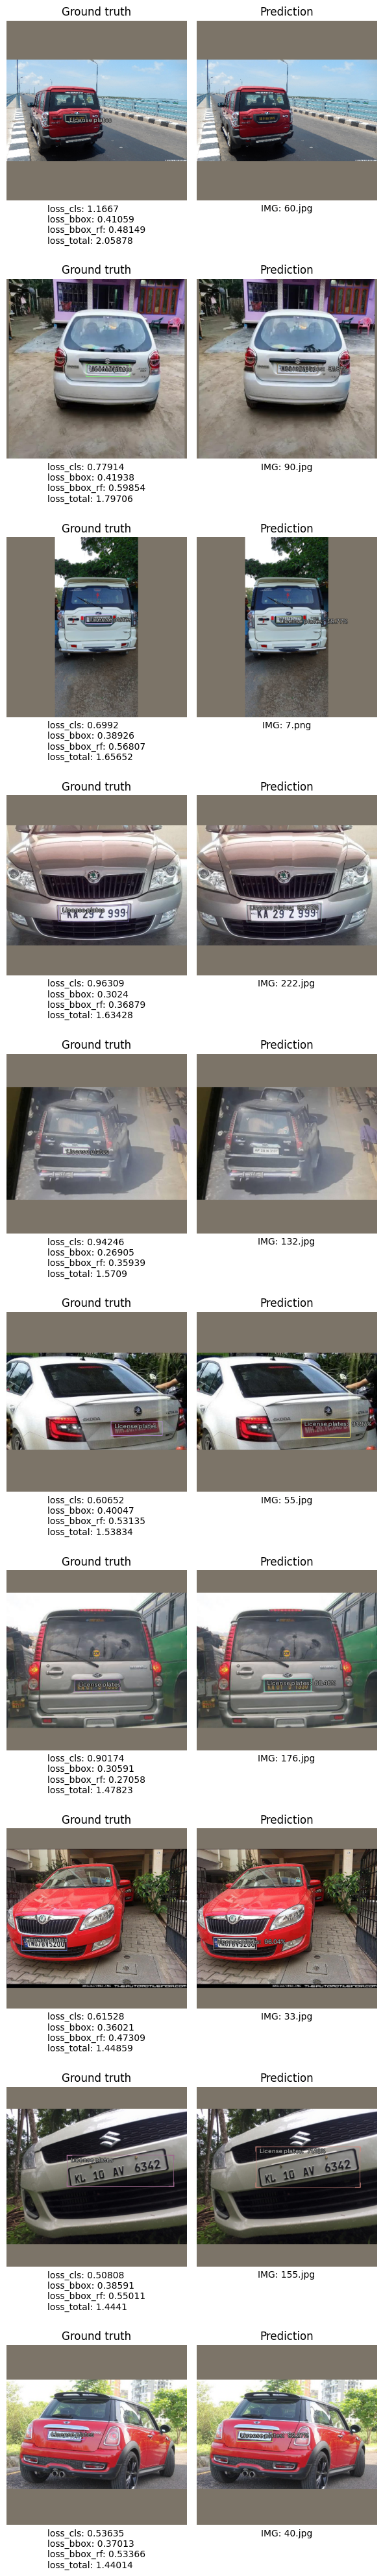

In [189]:
samples_plus_losses, preds, losses_stats = model_type.interp.plot_top_losses(model=model, dataset=valid_ds, sort_by="loss_total", n_samples=10)

In [190]:
from icevision.models import *

In [196]:
# How to save a model and its metadata
checkpoint_path = 'license-vfnet-swin-checkpoint-full.pth'

save_icevision_checkpoint(model, 
                        model_name='mmdet.vfnet', 
                        backbone_name='swin_t_p4_w7_fpn_1x_coco',
                        classes =  parser.class_map, 
                        img_size=image_size, 
                        filename=checkpoint_path,
                        meta={'icevision_version': '0.12.0'})

In [183]:
# Save the state dict
torch.save(model.state_dict(),'./license_vfnet_swin_model.pth')